In [41]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/데이콘 고객대출등급 분류/train.csv')

In [3]:
df.isnull().sum(axis=0)

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [4]:
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [5]:
discrete = ['대출기간','주택소유상태','대출목적','대출등급', '근로기간']

df_discrete =df.loc[:,discrete]

In [6]:
set_discrete = [set(df_discrete.iloc[:,i]) for i in range(len(discrete))]
set_discrete = [list(set_discrete[i]) for i in range(len(discrete))]
set_discrete

[[' 60 months', ' 36 months'],
 ['ANY', 'OWN', 'MORTGAGE', 'RENT'],
 ['의료',
  '주택',
  '신용 카드',
  '부채 통합',
  '기타',
  '이사',
  '주요 구매',
  '휴가',
  '자동차',
  '소규모 사업',
  '재생 에너지',
  '주택 개선'],
 ['D', 'C', 'A', 'B', 'G', 'E', 'F'],
 ['1 year',
  '<1 year',
  '10+years',
  '1 years',
  '2 years',
  '3',
  '9 years',
  '3 years',
  '8 years',
  '5 years',
  '< 1 year',
  '7 years',
  'Unknown',
  '6 years',
  '10+ years',
  '4 years']]

In [7]:
lst = []
for j in range(len(df_discrete.columns)):
    a= [df_discrete.iloc[:,j] == set_discrete[j][i] for i in range(len(set_discrete[j]))]
    lst.append(a)

In [8]:
lst2 =[]
for j in range(len(df_discrete.columns)):
    b=[(lst[j][i]*1).sum() for i in range(len(lst[j]))]
    lst2.append(b)


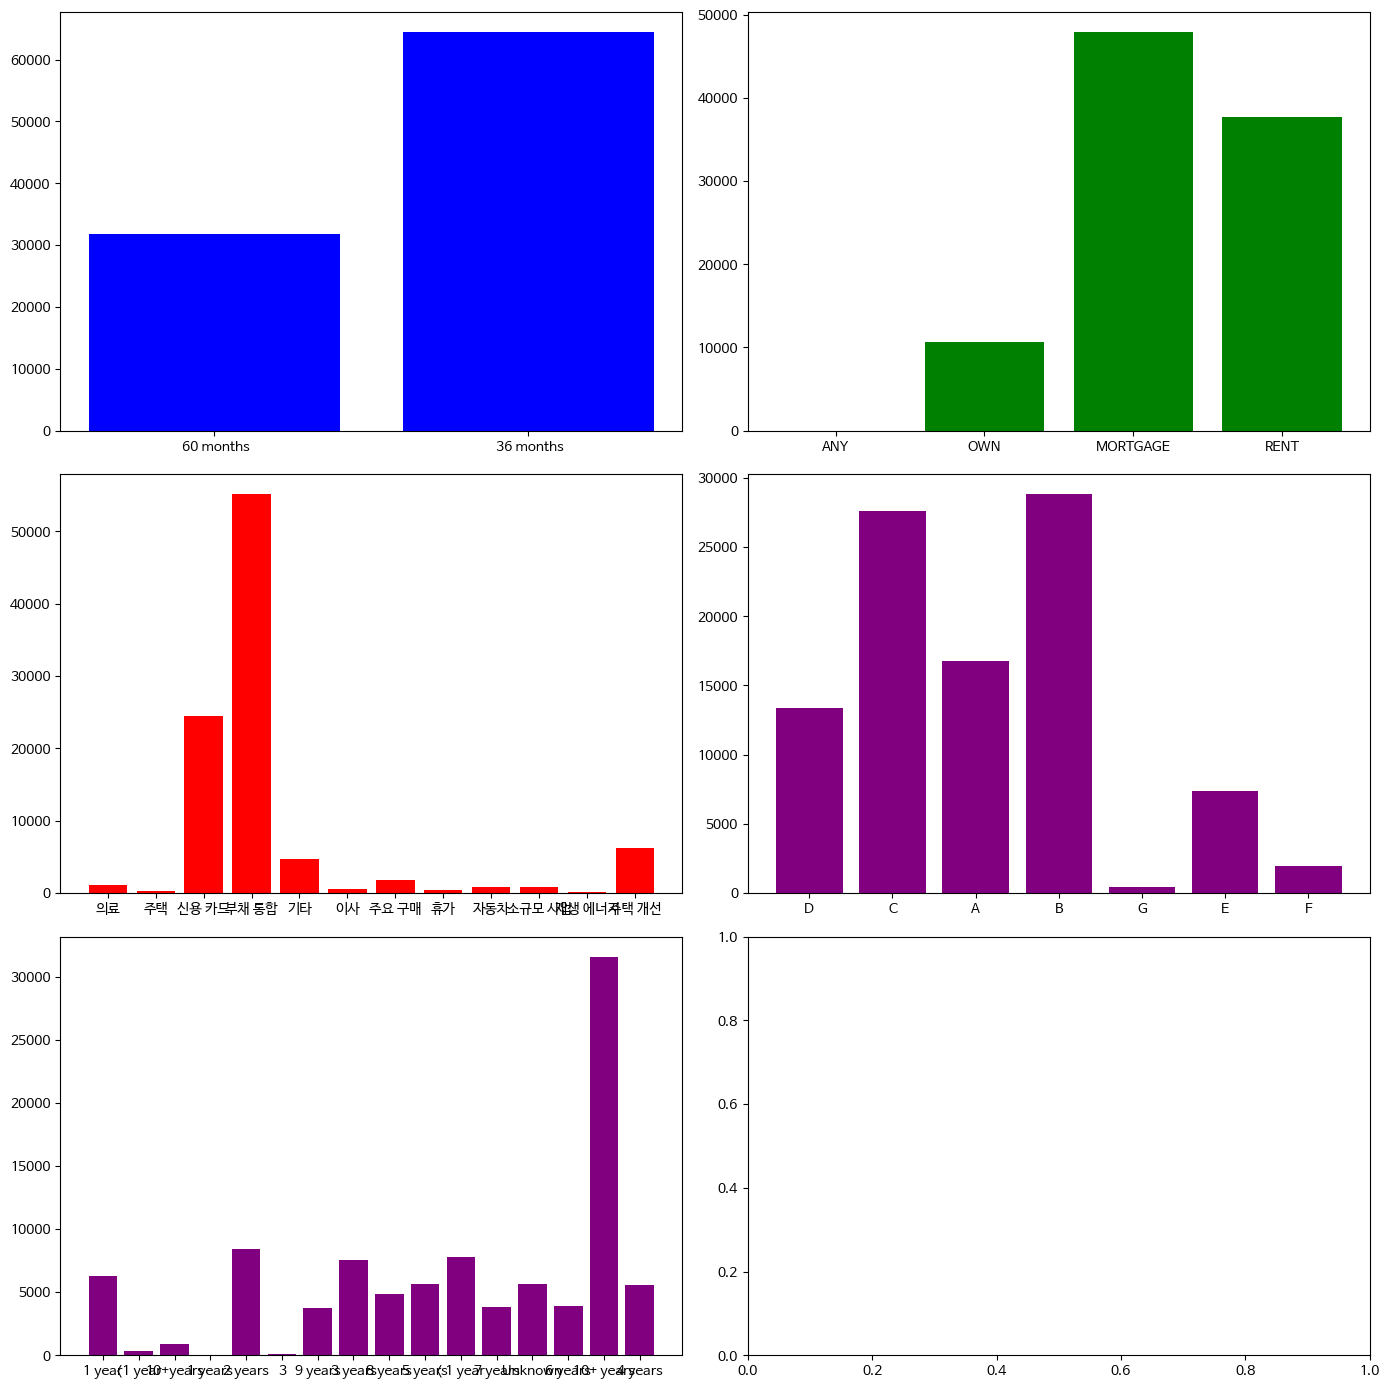

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# 각각의 축에 막대 그래프 추가
axes[0, 0].bar(set_discrete[0], lst2[0], color='blue')
axes[0, 1].bar(set_discrete[1],lst2[1], color='green')
axes[1, 0].bar(set_discrete[2],lst2[2], color='red')
axes[1, 1].bar(set_discrete[3],lst2[3], color='purple')
axes[2, 0].bar(set_discrete[4],lst2[4], color='purple')
# 레이아웃 조정
plt.tight_layout()
plt.show()

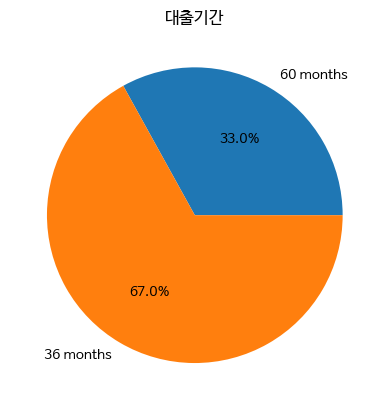

In [10]:
plt.pie(lst2[0],labels=set_discrete[0],autopct='%.1f%%');
plt.title('대출기간')
plt.show()

In [11]:
discreie_count= [pd.DataFrame({discrete[i]:lst2[i]},set_discrete[i]) for i in range(len(discrete))]
discreie_count[0]

,대출기간
60 months,31815
36 months,64479


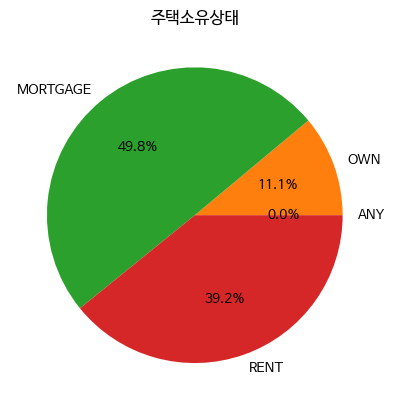

In [12]:
plt.pie(lst2[1],labels=set_discrete[1],autopct='%.1f%%');
plt.title('주택소유상태')
plt.show()

In [13]:
discreie_count[1]

,주택소유상태
ANY,1
OWN,10654
MORTGAGE,47934
RENT,37705


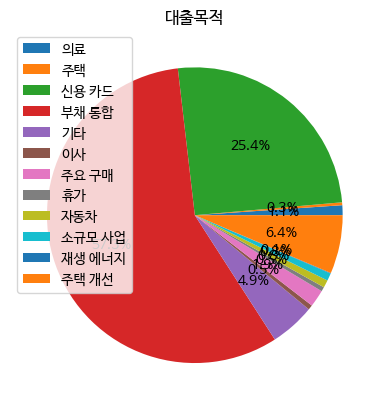

In [14]:
plt.pie(lst2[2],autopct='%.1f%%');
plt.title('대출목적')
plt.legend(set_discrete[2])
plt.show()

In [15]:
discreie_count[2].sort_values('대출목적',ascending=False)

,대출목적
부채 통합,55150
신용 카드,24500
주택 개선,6160
기타,4725
주요 구매,1803
의료,1039
자동차,797
소규모 사업,787
이사,506
휴가,466


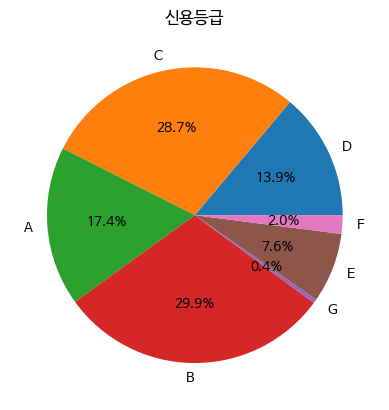

In [16]:
plt.pie(lst2[3],labels=set_discrete[3],autopct='%.1f%%');
plt.title('신용등급')
plt.show()

In [17]:
discreie_count[3].sort_values('대출등급',ascending=False)

,대출등급
B,28817
C,27623
A,16772
D,13354
E,7354
F,1954
G,420


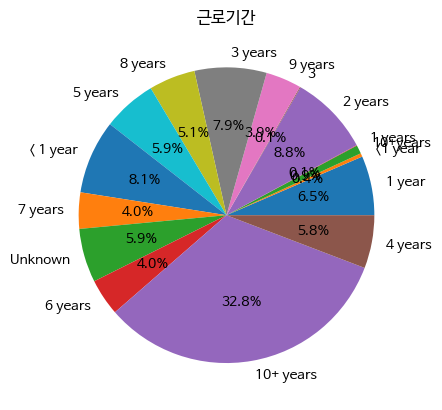

In [18]:
plt.pie(lst2[4],labels=set_discrete[4],autopct='%.1f%%');
plt.title('근로기간')
plt.show()

In [19]:
discreie_count[4].sort_values('근로기간',ascending=False)

,근로기간
10+ years,31585
2 years,8450
< 1 year,7774
3 years,7581
1 year,6249
Unknown,5671
5 years,5665
4 years,5588
8 years,4888
6 years,3874
